<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

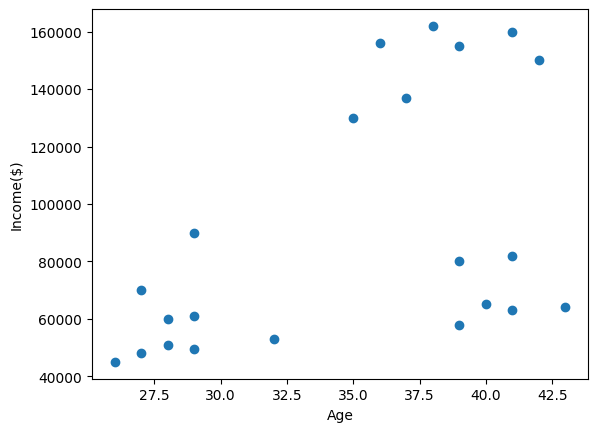

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [ ]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

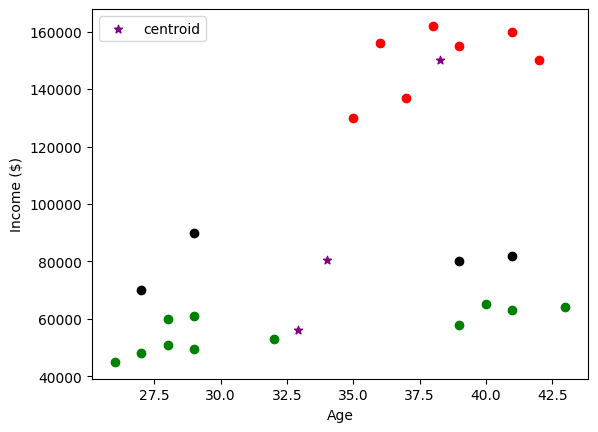

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [ ]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


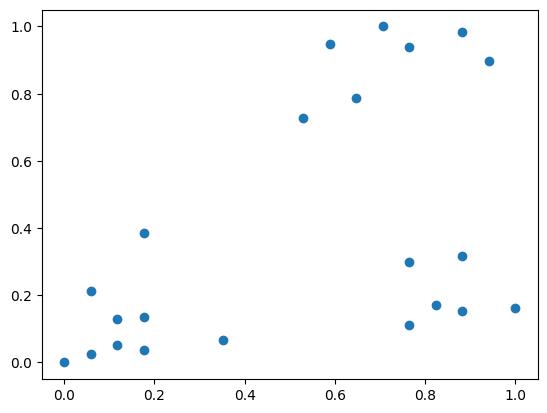

In [ ]:
plt.scatter(df.Age,df['Income($)'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

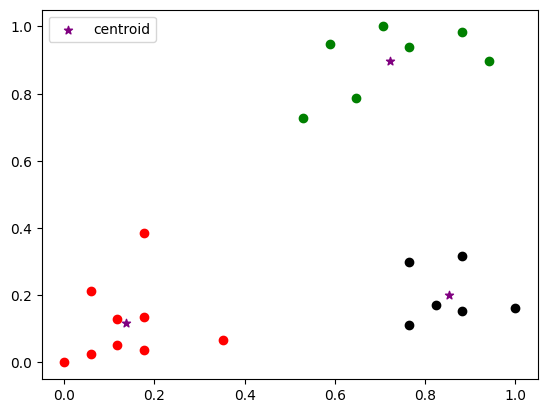

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

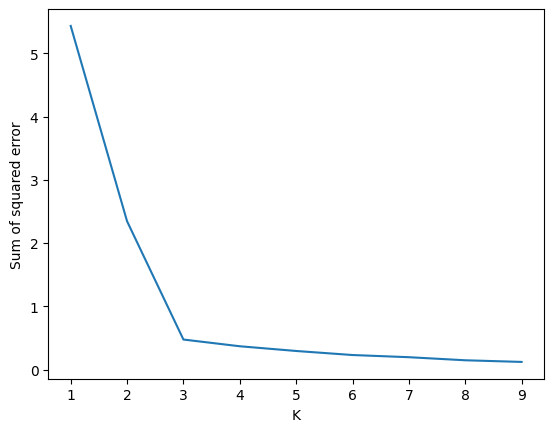

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)



---



For k = 2, Silhouette Score: 0.5305
For k = 3, Silhouette Score: 0.7130
For k = 4, Silhouette Score: 0.6136
For k = 5, Silhouette Score: 0.4663
For k = 6, Silhouette Score: 0.4579
For k = 7, Silhouette Score: 0.4494
For k = 8, Silhouette Score: 0.3155
For k = 9, Silhouette Score: 0.2898


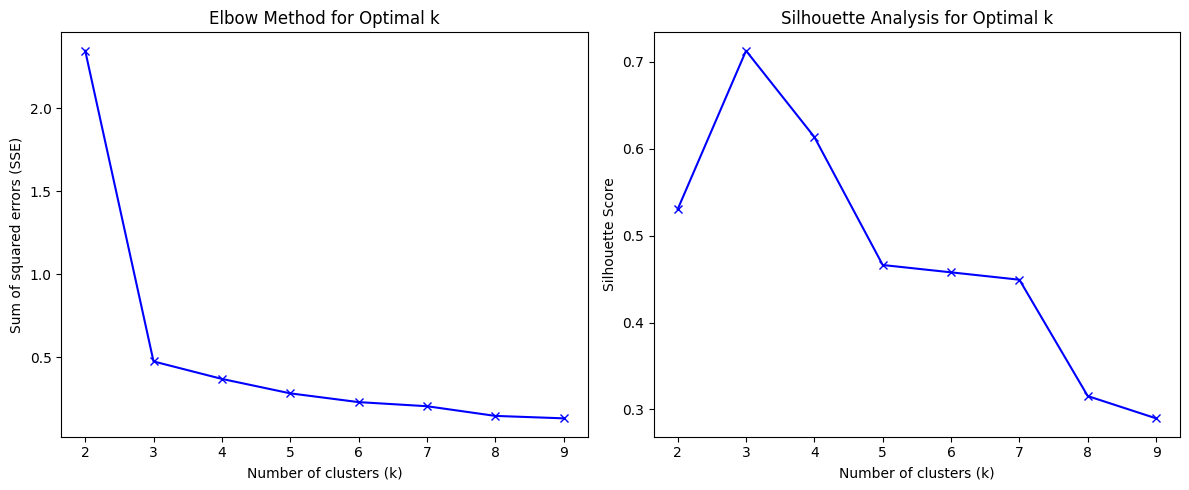


Optimal number of clusters (based on silhouette score): 3


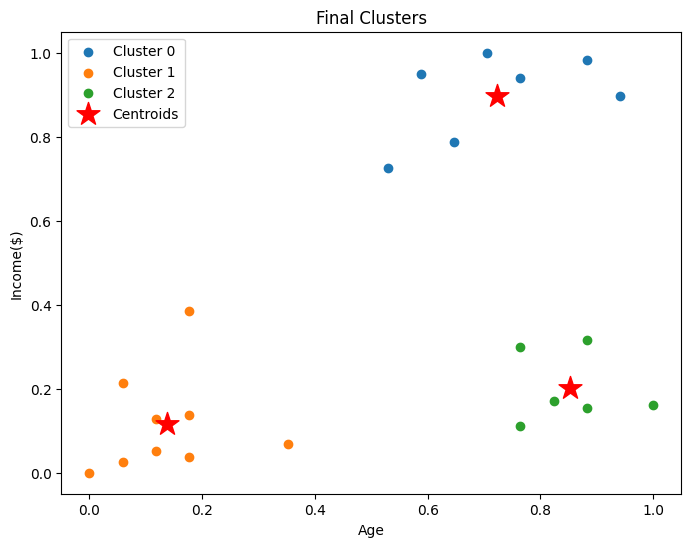

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np
sse = []
silhouette_scores = []
k_rng = range(2, 10)  # Starting from 2 (silhouette requires at least 2 clusters)

# Calculate SSE and silhouette scores for different k values
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)  # Inertia = SSE

    # Silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        silhouette_avg = silhouette_score(df[['Age','Income($)']], km.labels_)
        silhouette_scores.append(silhouette_avg)
        print(f"For k = {k}, Silhouette Score: {silhouette_avg:.4f}")

# Plot the Elbow Method (SSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_rng, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')

plt.tight_layout()
plt.show()

# Determine optimal k (highest silhouette score)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k}")

# Fit final model with optimal k
final_km = KMeans(n_clusters=optimal_k, random_state=42)
final_km.fit(df[['Age','Income($)']])
df['Cluster'] = final_km.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(df[df['Cluster'] == i]['Age'],
                df[df['Cluster'] == i]['Income($)'],
                label=f'Cluster {i}')
plt.scatter(final_km.cluster_centers_[:, 0],
            final_km.cluster_centers_[:, 1],
            s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Final Clusters')
plt.legend()
plt.show()

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


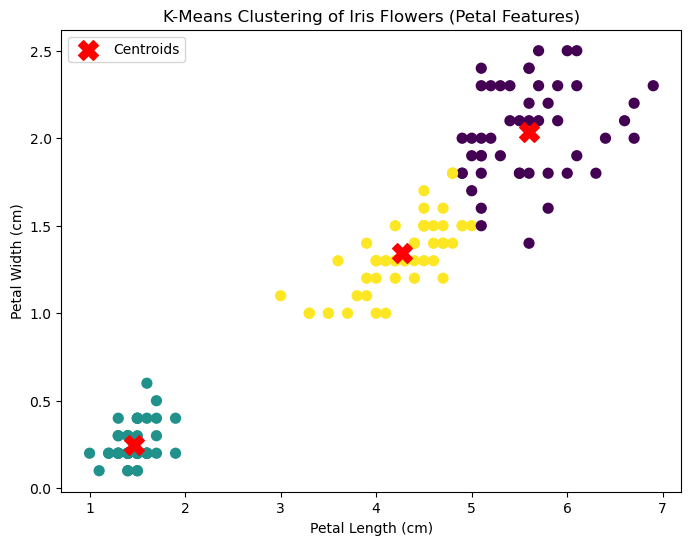

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with petal length and width only
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X = X[['petal length (cm)', 'petal width (cm)']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
X['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=X['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Flowers (Petal Features)')
plt.legend()
plt.show()


C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


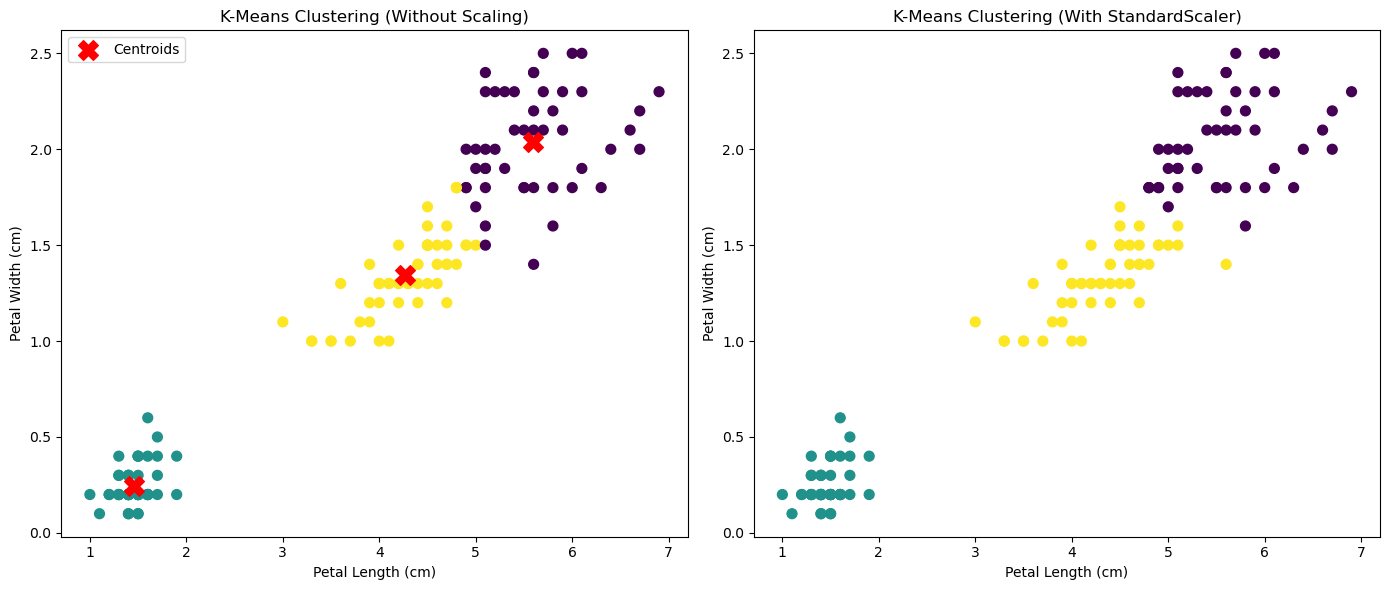

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with only petal length and petal width
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X = X[['petal length (cm)', 'petal width (cm)']]

# -------------------------------
# 1️⃣ K-Means without scaling
# -------------------------------
kmeans_raw = KMeans(n_clusters=3, random_state=42)
kmeans_raw.fit(X)
X['cluster_raw'] = kmeans_raw.labels_

# -------------------------------
# 2️⃣ K-Means with scaling
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['petal length (cm)', 'petal width (cm)']])

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(X_scaled)
X['cluster_scaled'] = kmeans_scaled.labels_

# -------------------------------
# 3️⃣ Visualization
# -------------------------------
plt.figure(figsize=(14, 6))

# Without scaling
plt.subplot(1, 2, 1)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],
            c=X['cluster_raw'], cmap='viridis', s=50)
plt.scatter(kmeans_raw.cluster_centers_[:, 0], kmeans_raw.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (Without Scaling)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

# With scaling
plt.subplot(1, 2, 2)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],
            c=X['cluster_scaled'], cmap='viridis', s=50)
plt.title('K-Means Clustering (With StandardScaler)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()


C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dhanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

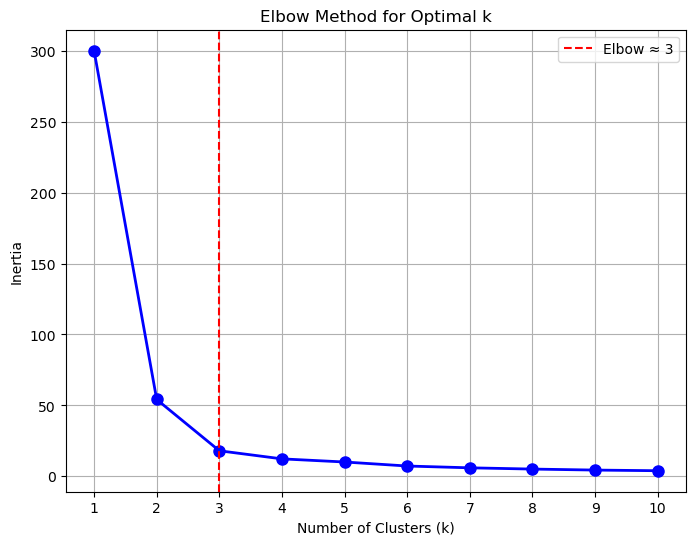

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Keep only petal length and petal width
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X = X[['petal length (cm)', 'petal width (cm)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 1️⃣ Compute inertia for different k
# -------------------------------
inertia = []
K = range(1, 11)  # test k = 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # sum of squared distances to nearest cluster center

# -------------------------------
# 2️⃣ Plot the Elbow Curve
# -------------------------------
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)

# Highlight the elbow visually (expected around k=3)
plt.axvline(x=3, color='r', linestyle='--', label='Elbow ≈ 3')
plt.legend()
plt.show()
